In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# File to Load (Remember to Change These)
md_data = pd.read_csv("data/mouse_drug_data.csv")
ct_data = pd.read_csv("data/clinicaltrial_data.csv")

In [5]:
#md_data.head()
ct_data.head()
#use Mouse ID to join

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Read the Mouse and Drug Data and the Clinical Trial Data
merged_data = pd.merge(md_data, ct_data, how ="outer", on="Mouse ID")
merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [7]:
merged_data.Drug.unique()

array(['Stelasyn', 'Propriva', 'Naftisol', 'Ketapril', 'Capomulin',
       'Infubinol', 'Ceftamin', 'Zoniferol', 'Ramicane', 'Placebo'],
      dtype=object)

The objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

In [8]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment, on average.

#mechanism -> grouping timepoint and drug type by total tumor volume and calculate the mean for each drug and timepoint
#tvol_change=tumor volume change

tvol_chg = merged_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
#tvol_chg

In [9]:
# create a pivot table that shows the mean tumor volume for each drug and timepoint
tvol_chg = pd.pivot_table(merged_data, values='Tumor Volume (mm3)', index='Timepoint', columns='Drug', aggfunc='mean')
tvol_chg=tvol_chg.round(2)
tvol_chg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00
5,44.27,46.50,47.06,47.39,46.80,47.13,47.25,43.94,47.53,46.85
10,43.08,48.29,49.40,49.58,48.69,49.42,49.10,42.53,49.46,48.69
15,42.06,50.09,51.30,52.40,50.93,51.36,51.07,41.50,51.53,50.78
20,40.72,52.16,53.20,54.92,53.64,54.36,53.35,40.24,54.07,53.17
25,39.94,54.29,55.72,57.68,56.73,57.48,55.50,38.97,56.17,55.43
30,38.77,56.77,58.30,60.99,59.56,59.81,58.20,38.70,59.83,57.71
35,37.82,58.83,60.74,63.37,62.69,62.42,60.35,37.45,62.44,60.09
40,36.96,61.47,63.16,66.07,65.60,65.05,63.05,36.57,65.36,62.92


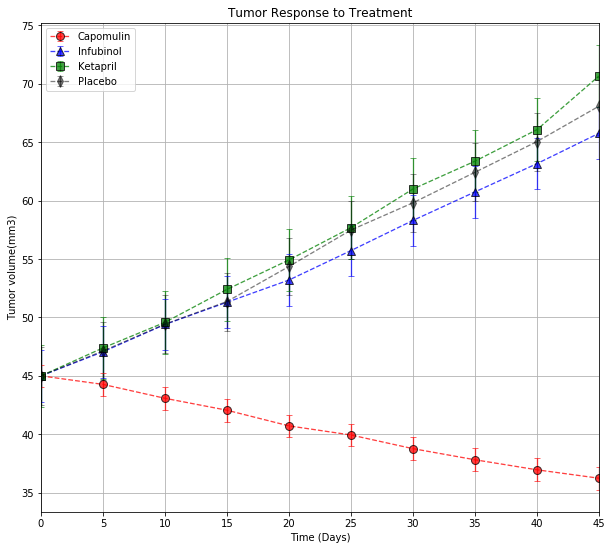

In [48]:
# Only plotting results for Capomulin, Infubinol, Ketapril, and the Placebo group
# pandas.DataFrame.sem() returns the standard error of the mean over requested axis; 
# documentation https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html

plt.figure(figsize=(10,9))
Timepoint = tvol_chg.index
plt.errorbar(Timepoint, tvol_chg['Capomulin'], yerr=tvol_chg['Capomulin'].sem(), marker ='o', mfc='red',
         mec='black', ms=8, ecolor='red', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='red', 
            alpha=0.75, label="Capomulin")
plt.errorbar(Timepoint, tvol_chg['Infubinol'], yerr=tvol_chg['Infubinol'].sem(), marker ='^', mfc='blue',
         mec='black', ms=8, ecolor='blue', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='blue', 
             alpha=0.75, label="Infubinol")
plt.errorbar(Timepoint, tvol_chg['Ketapril'], yerr=tvol_chg['Ketapril'].sem(), marker ='s', mfc='green',
         mec='black', ms=8, ecolor='green', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='green', 
             alpha=0.75, label="Ketapril")
plt.errorbar(Timepoint, tvol_chg['Placebo'], yerr=tvol_chg['Placebo'].sem(), marker ='d', mfc='black',
         mec='black', ms=8, ecolor='black', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='black', 
             alpha=0.5, label="Placebo")

plt.gca().set(xlabel='Time (Days)',ylabel='Tumor volume(mm3)',title='Tumor Response to Treatment',xlim=(0,Timepoint.max()))
plt.grid()
plt.legend(loc = 'best')
plt.show()
#plt.savefig('Scatter plot TimeResponseToTreatment.png')

Metastatic Response to Treatment

In [11]:
# number of other organs affected by tumor (metastatic sites) changes over time and for each drug
ms_chg = merged_data.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']

# create a pivot table to display all metastatic changes
ms_chg = pd.pivot_table(merged_data, values='Metastatic Sites', index='Timepoint', columns='Drug', aggfunc='mean')
ms_chg=ms_chg.round(2)
ms_chg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.16,0.38,0.28,0.30,0.26,0.38,0.32,0.12,0.24,0.17
10,0.32,0.60,0.67,0.59,0.52,0.83,0.57,0.25,0.48,0.50
15,0.38,0.79,0.90,0.84,0.86,1.25,0.76,0.33,0.78,0.81
20,0.65,1.11,1.05,1.21,1.15,1.53,1.00,0.35,0.95,1.29
25,0.82,1.50,1.28,1.63,1.50,1.94,1.36,0.65,1.16,1.69
30,1.09,1.94,1.59,2.06,2.07,2.27,1.62,0.78,1.39,1.93
35,1.18,2.07,1.67,2.29,2.27,2.64,2.30,0.95,1.56,2.29
40,1.38,2.36,2.10,2.73,2.47,3.17,2.78,1.10,1.58,2.79


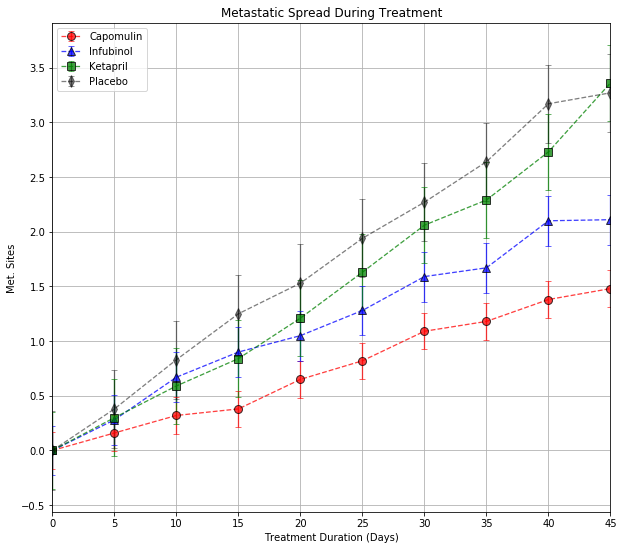

In [47]:
plt.figure(figsize=(10,9))
Timepoint = ms_chg.index

plt.errorbar(Timepoint, ms_chg['Capomulin'], yerr=ms_chg['Capomulin'].sem(), marker ='o', mfc='red',
         mec='black', ms=8, ecolor='red', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='red', 
            alpha=0.75, label="Capomulin")
plt.errorbar(Timepoint, ms_chg['Infubinol'], yerr=ms_chg['Infubinol'].sem(), marker ='^', mfc='blue',
         mec='black', ms=8, ecolor='blue', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='blue', 
             alpha=0.75, label="Infubinol")
plt.errorbar(Timepoint, ms_chg['Ketapril'], yerr=ms_chg['Ketapril'].sem(), marker ='s', mfc='green',
         mec='black', ms=8, ecolor='green', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='green', 
             alpha=0.75, label="Ketapril")
plt.errorbar(Timepoint, ms_chg['Placebo'], yerr=ms_chg['Placebo'].sem(), marker ='d', mfc='black',
         mec='black', ms=8, ecolor='black', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='black', 
             alpha=0.5, label="Placebo")

plt.gca().set(xlabel='Treatment Duration (Days)',ylabel='Met. Sites',title='Metastatic Spread During Treatment',xlim=(0,Timepoint.max()))
plt.grid()
plt.legend(loc = 'best')
plt.show()

Survival Rates

In [13]:
#calculating mice survival rate by first grouping and then counting the number of mice for each timepoint and drug
ms_rate = merged_data.groupby(['Drug','Timepoint']).count()['Mouse ID']
#ms_rate
# creating a pivot table that shows the above mice count
ms_rate = pd.pivot_table(merged_data, values='Mouse ID', index='Timepoint', columns='Drug', aggfunc='count')
ms_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [14]:
# using lambda to calculate % mice surviving each timepoint for each drug (thanks to Eric McMillan's lambdas intro!)
ms_perc = ms_rate.apply(lambda x: (x/x.max())*100)
ms_perc=ms_perc.round(2)
ms_perc

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


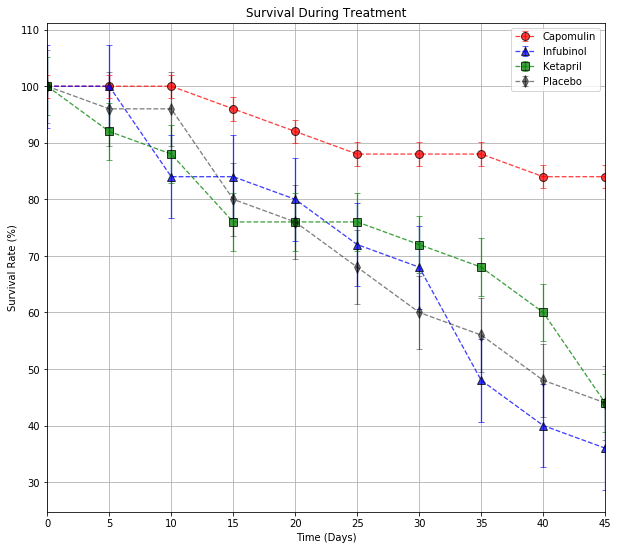

In [46]:
plt.figure(figsize=(10,9))
Timepoint = ms_perc.index

plt.errorbar(Timepoint, ms_perc['Capomulin'], yerr=ms_perc['Capomulin'].sem(), marker ='o', mfc='red',
         mec='black', ms=8, ecolor='red', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='red', 
            alpha=0.75, label="Capomulin")
plt.errorbar(Timepoint, ms_perc['Infubinol'], yerr=ms_perc['Infubinol'].sem(), marker ='^', mfc='blue',
         mec='black', ms=8, ecolor='blue', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='blue', 
             alpha=0.75, label="Infubinol")
plt.errorbar(Timepoint, ms_perc['Ketapril'], yerr=ms_perc['Ketapril'].sem(), marker ='s', mfc='green',
         mec='black', ms=8, ecolor='green', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='green', 
             alpha=0.75, label="Ketapril")
plt.errorbar(Timepoint, ms_perc['Placebo'], yerr=ms_perc['Placebo'].sem(), marker ='d', mfc='black',
         mec='black', ms=8, ecolor='black', capsize=3, capthick=0.8, linestyle='--', linewidth=1.3, color='black', 
             alpha=0.5, label="Placebo")

plt.gca().set(xlabel='Time (Days)',ylabel='Survival Rate (%)',title='Survival During Treatment',xlim=(0,Timepoint.max()))
plt.grid()
plt.legend(loc = 'best')
plt.show()

Summary Bar Graph

In [72]:
# Calculate the % tumor change for each drug for the entire time period
# tv_chg_perc = tumor volume percent change
# generate a bar graph

tv_chg_perc = (((tvol_chg.iloc[-1]-tvol_chg.iloc[0])/tvol_chg.iloc[0])*100)

# pandas.Series.to_frame converts the series to DataFrame
tv_chg_perc = tv_chg_perc.to_frame('Tumor % Change')
tv_chg_perc=tv_chg_perc.round(2)

#dropping columns we do not need to plot
tv_chg_perc.drop(['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], axis=0, inplace =True)
tv_chg_perc

,Tumor % Change
Drug,
Capomulin,-19.47
Infubinol,46.13
Ketapril,57.02
Placebo,51.29


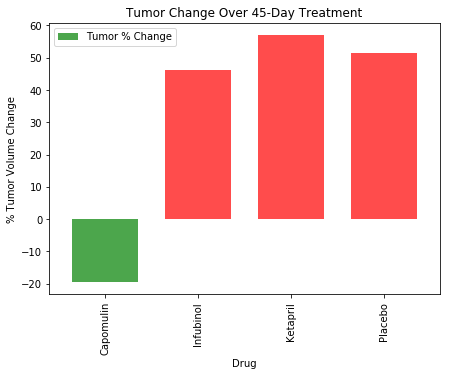

In [89]:
# Attempt at bar chart #1
plt.figure(figsize=(7,5))

# setting up x and y axes for the bar chart
x = tv_chg_perc.index
y = tv_chg_perc['Tumor % Change']

# applying conditional statement of True for positive change and False for negative change
tv_chg_perc['Growing'] = tv_chg_perc['Tumor % Change'] > 0
tv_chg_perc

# plotting a bar chart

tv_chg_perc['Tumor % Change'].plot(kind='bar', color=tv_chg_perc.Growing.map({True: 'r', False: 'g'}), alpha=0.7, width=0.7)
#plt.grid()
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45-Day Treatment')

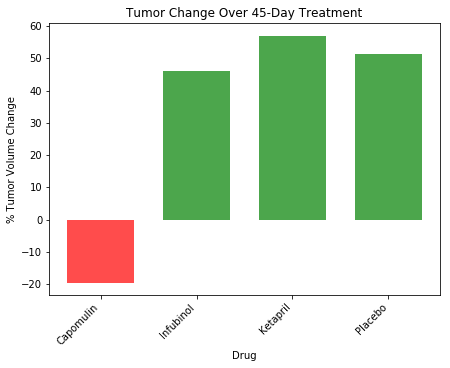

In [78]:
# attempt at bar chart #2
plt.figure(figsize=(7,5))
# create a list of numbers for x values
x_axis = tv_chg_perc.index
y_axis = tv_chg_perc['Tumor % Change']

tick_locations = np.arange(len(y_axis))

# create bar chart and set the values of xticks
#documentation https://python-graph-gallery.com/3-control-color-of-barplots/
#documentation https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

#originaly wrote the colors for all drugs, but snce the sequence is the same, it works for a subset as well
plt.bar(tick_locations, y_axis, align="center", color=["green", "red", "red", "red", "red", "red", "red", "green", "red", "red"], alpha=0.7, width=0.7)
plt.xticks(tick_locations, x_axis, rotation=45, ha="right")

plt.xlabel('Drug')
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45-Day Treatment')
#plt.grid()
plt.show()

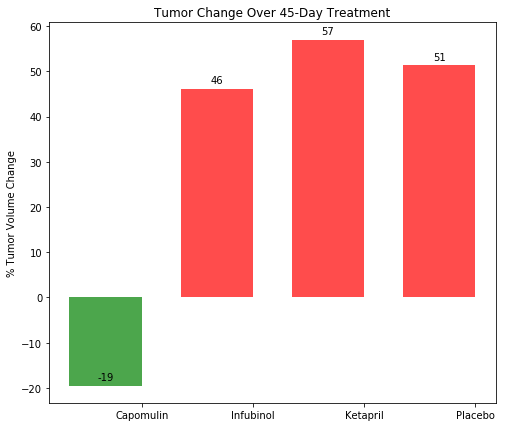

In [88]:
# ...and #3, with extra documentation
#documentation https://matplotlib.org/examples/api/barchart_demo.html
# http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
# https://stackoverflow.com/questions/19932553/size-of-figure-when-using-plt-subplots


width = 0.65       # the width of the bars

# create a list of numbers for x values
x_axis = tv_chg_perc.index
y_axis = tv_chg_perc['Tumor % Change']

tick_locations = np.arange(len(y_axis))

fig, ax = plt.subplots(figsize=(8,7))
bars = ax.bar(tick_locations, y_axis, width, color=('g', 'r', 'r', 'r'), alpha=0.7)
# note to self - 1) ask if there is a better way, other than the FOR loop, to assign color to bars
# not to self cont' - 2) IF NOT, then learn to write the FOR loop

# add some text for labels, title and axes ticks
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45-Day Treatment')
ax.set_xticks(tick_locations + width / 2)
ax.set_xticks(tick_locations)
#ax.set_xticklabels(x_axis)

plt.xticks(tick_locations, x_axis, rotation=45, ha="right")
#mostly copy-pasta and tweaking, so not sure i can take credit, but submitting anyways...

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # this number is arbitrary
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(bars, ax)
plt.show()

Analysis

Capomulin was the only treatment that has shown statistically significant positive results amongst the four evaluated drugs, as compared to the placebo group and given the sample size.  